In [4]:
# Tarea Análisis Numérico
# Autor: Luis Mario Ruelas Heras

# Problemas 7.1
# Ejercicio 3. Integrar y' = sin(y) y(0) = 1, desde x = 0 hasta 0.5, con el
# método de Euler usando h = 0.1.

import numpy as np
import matplotlib.pyplot as plt
from math import *

def eulerint(F, x, y, xStop, h):
  X=[]
  Y=[]
  X.append(x)
  Y.append(y)
  while x<xStop:
    h=min(h,xStop-x)
    y=y+h*F(x,y)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)  

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)
  
def F(x,y):
  F = np.array([sin(y[0])])
  return F

y = np.array([1.0])
X, Y = eulerint(F, 0.0, y, 5.0, 0.1)
print("La solución es")
imprimeSol(X, Y, 4)

# Comparando los resultados de x=0.0 y x=0.4, podemos concluir
# que son muy similares a los del ejemplo 7.3.

La solución es

 x   y[ 0 ]  
   0.0000e+00    1.0000e+00 
   4.0000e-01    1.3601e+00 
   8.0000e-01    1.7568e+00 
   1.2000e+00    2.1330e+00 
   1.6000e+00    2.4417e+00 
   2.0000e+00    2.6698e+00 
   2.4000e+00    2.8282e+00 
   2.8000e+00    2.9348e+00 
   3.2000e+00    3.0056e+00 
   3.6000e+00    3.0523e+00 
   4.0000e+00    3.0830e+00 
   4.4000e+00    3.1031e+00 
   4.8000e+00    3.1164e+00 
   5.0000e+00    3.1211e+00 


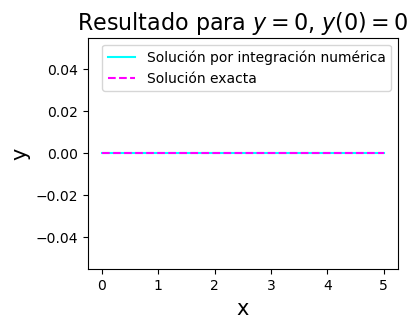

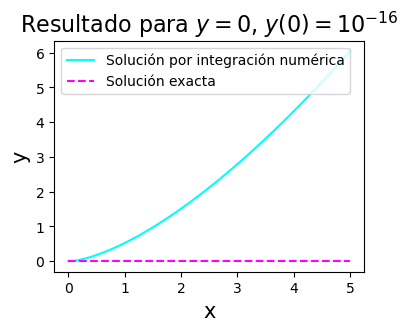

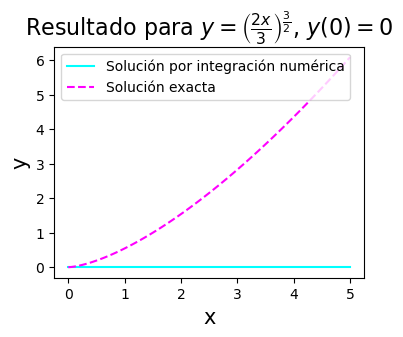

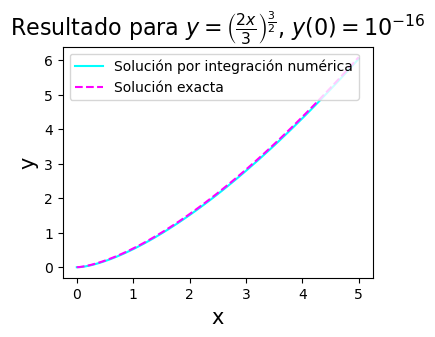

Si la condición inicial es y(0) = 0, la solución es y = 0.
Si la condición inicial es y(0) = 10^(-16), la solución es y = (2x/3)^(3/2)


In [11]:
# Ejercicio 4. Verificar que el problema y'=y^(1/3) y(0)=0 tiene dos soluciones
# y=0 y y=(2x/3)^(3/2). ¿Cual de las soluciones seria producida por una integracion
# numérica si la condición inicial es (a) y=0 y (b) y=10^(-16)? Verificar
# las conclusiones integrando con cualquier método numerico.

# Utilizando el método RK4

def Run_Kut4(F, x, y,xStop,h):
  def run_kut4(F,x,y,h):
    K0 = h*F(x,y)
    K1 = h*F(x + h/2.0, y + K0/2.0)
    K2 = h*F(x + h/2.0, y + K1/2.0)
    K3 = h*F(x + h, y + K2)
    return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0
  X = []
  Y = []
  X.append(x)
  Y.append(y)
  while x < xStop:
    h = min(h,xStop - x)
    y = y + run_kut4(F,x,y,h)
    x=x+h
    X.append(x)
    Y.append(y)
  return np.array(X),np.array(Y)

def imprimeSol(X,Y,frec):
 
  def imprimeEncabezado(n):
    print("\n x ",end=" ")
    for i in range (n):
      print(" y[",i,"] ",end=" ")
    print()

  def imprimeLinea(x,y,n):
    print("{:13.4e}".format(x),end=" ")
    for i in range (n):
      print("{:13.4e}".format(y[i]),end=" ")
    print() 
  
  m = len(Y)
  try: n = len(Y[0])
  except TypeError: n = 1
  if frec == 0: frec = m
  imprimeEncabezado(n)
  for i in range(0,m,frec):
   imprimeLinea(X[i],Y[i],n)
  if i != m - 1: imprimeLinea(X[m - 1],Y[m - 1],n)
  
def G(x, y):
  F = np.zeros(1)
  F[0] = y[0]**(1/3)
  return F

# Condiciones iniciales
y1 = np.array([0.0])
y2 = np.array([10**(-16)])

# Calcular soluciones
X1, Y1 = Run_Kut4(G, 0.0, y1, 5.0, 0.05)
X2, Y2 = Run_Kut4(G, 0.0, y2, 5.0, 0.05)

# Definir soluciones exactas
# Para y = 0
s1 = np.zeros(len(X1))
# Para y=(2x/3)^(3/2)
def s2(x):
    s2 = (2*x /3)**(3/2)
    return s2
s2a = s2(X1)
s2b = s2(X2)

# Comprobamos los resultados graficando
# Para y=0, y(0)=0
plt.figure(figsize = (4,3))
plt.plot(X1, Y1[:, 0], color = 'cyan', label = 'Solución por integración numérica')
plt.plot(X1, s1, color = 'magenta', label = 'Solución exacta', linestyle = '--')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title(r'Resultado para $y = 0$, $y(0) = 0$', fontsize = 16)
plt.legend()
plt.show()

# Para y=0, y(0)=10^(-16)
plt.figure(figsize = (4,3))
plt.plot(X2, Y2[:, 0], color = 'cyan', label = 'Solución por integración numérica')
plt.plot(X2, s1, color = 'magenta', label = 'Solución exacta', linestyle = '--')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title(r'Resultado para $y = 0$, $y(0) = 10^{-16}$', fontsize = 16)
plt.legend()
plt.show()

# Para y=(2x/3)^(3/2), y(0)=0
plt.figure(figsize = (4,3))
plt.plot(X1, Y1[:, 0], color = 'cyan', label = 'Solución por integración numérica')
plt.plot(X1, s2a, color = 'magenta', label = 'Solución exacta', linestyle = '--')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title(r'Resultado para $y=\left(\frac{2x}{3} \right)^{\frac{3}{2}}$, $y(0) = 0$', fontsize = 16)
plt.legend()
plt.show()

# Para y=(2x/3)^(3/2), y(0)=10^(-16)
plt.figure(figsize = (4,3))
plt.plot(X2, Y2[:, 0], color = 'cyan', label = 'Solución por integración numérica')
plt.plot(X2, s2b, color = 'magenta', label = 'Solución exacta', linestyle = '--')
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title(r'Resultado para $y=\left(\frac{2x}{3} \right)^{\frac{3}{2}}$, $y(0)=10^{-16}$', fontsize = 16)
plt.legend()
plt.show()

# Viendo las gráficas, podemos concluir que la solución trivial y=0 se obtiene
# con la condicion inicial y(0)=0, y la solución y=(2x/3)^(3/2) se obtiene con
# con la condición inicial y(0)=10^(-16).

print('Si la condición inicial es y(0) = 0, la solución es y = 0.')
print('Si la condición inicial es y(0) = 10^(-16), la solución es y = (2x/3)^(3/2)')

La solución es

 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    1.0000e+00   -2.8940e-01 
   2.0000e-01    9.3461e-01   -3.6534e-01 
   4.0000e-01    8.5348e-01   -4.4705e-01 
   6.0000e-01    7.5528e-01   -5.3642e-01 
   8.0000e-01    6.3824e-01   -6.3595e-01 
   1.0000e+00    5.0000e-01   -7.4903e-01 
   1.0000e+00    5.0000e-01   -7.4903e-01 


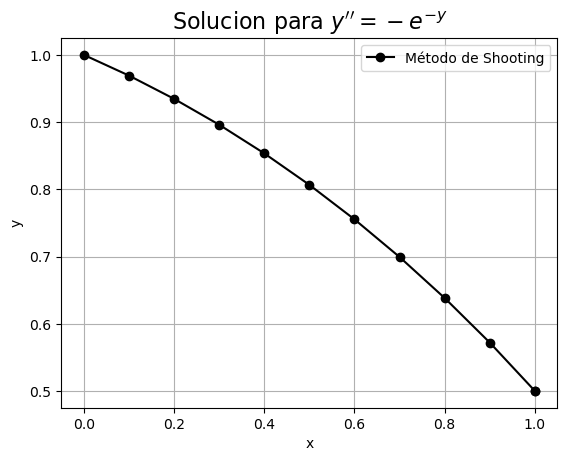

y'(0) = -0.2894


In [10]:
# Problemas 8.1
# Ejercicio 3. Bosqueje aproximadamente la solución de los siguientes problemas con valor
# frontera. Use el bosquejo para estimar y'(0) en cada problema.

# (a) y"=-e^(-y), y(0) = 1, y(1)=0.5

# Método de Ridder
def Ridder(f,a,b,tol=1.0e-9): 
  fa = f(a)
  if fa == 0.0: return a
  fb = f(b)
  if fb == 0.0: return b
  if np.sign(fa)!= np.sign(fb): c = a; fc = fa
  for i in range(30):
    c = 0.5*(a + b); fc = f(c)
    s = sqrt(fc**2 - fa*fb)
    if s == 0.0: return None
    dx = (c - a)*fc/s
    if (fa - fb) < 0.0: dx = -dx
    x = c + dx; fx = f(x)
    if i > 0:
      if abs(x - xOld) < tol*max(abs(x),1.0): return x
    xOld = x
    if np.sign(fc) == np.sign(fx):
      if np.sign(fa)!= np.sign(fx): b = x; fb = fx
      else: a = x; fa = fx
    else:
      a = c; b = x; fa = fc; fb = fx
  return None

# Metodo de Shooting
def initCond(u): 
    return np.array([1.0, u]) # Valores iniciales de [y, y']

def r(u): #
    X, Y = Run_Kut4(F1, x, initCond(u), xStop, h)
    y = Y[-1]                 # Ultima posición de Y
    r = y[0] - 0.5            # Residuo límite
    return r

# Arreglo de ecuaciones diferenciales
def F1(x, y):
  F = np.zeros(2)
  F[0] = y[1]
  F[1] = - e**(-y[0])
  return F

x, xStop = 0.0, 1.0 # Límites de integración
h = 0.1
u = Ridder(r, -1.0, 1.0)
XA, YA = Run_Kut4(F1, x, initCond(u), xStop, h)
print("La solución es")
imprimeSol(XA,YA, 2)

# Grafica de la solución
plt.plot(XA, YA[:, 0], "-o", label = "Método de Shooting", color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Solucion para $y''=-e^{-y}$", fontsize = 16)
plt.legend()
plt.grid()
plt.show()

# Imprimir respuesta
print(f"y'(0) = {YA[0,1]:.4f}")

La solución es

 x   y[ 0 ]   y[ 1 ]  
   0.0000e+00    0.0000e+00    1.5539e+00 
   2.0000e-01    3.3077e-01    1.7538e+00 
   4.0000e-01    7.0135e-01    1.9508e+00 
   6.0000e-01    1.1099e+00    2.1291e+00 
   8.0000e-01    1.5490e+00    2.2460e+00 
   1.0000e+00    2.0000e+00    2.2394e+00 
   1.0000e+00    2.0000e+00    2.2394e+00 


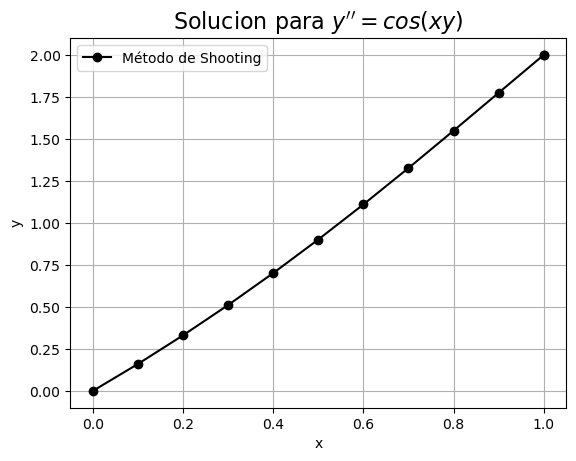

y'(0) = 1.5539


In [8]:
# (c) y"=cos(xy), y(0)=0, y(1)=2

# Metodo de Shooting
def initCond(u): 
    return np.array([0.0, u]) # Valores iniciales de [y, y']

def r(u): #
    X, Y = Run_Kut4(F2, x, initCond(u), xStop, h)
    y = Y[-1]                 # Ultima posición de Y
    r = y[0] - 2.0            # Residuo límite
    return r

# Arreglo de ecuaciones diferenciales
def F2(x, y):
  F = np.zeros(2)
  F[0] = y[1]
  F[1] = cos(x*y[0])
  return F

x, xStop = 0.0, 1.0 # Límites de integración
h = 0.1
u = Ridder(r, 0.0, 10.0)
XC, YC = Run_Kut4(F2, x, initCond(u), xStop, h)
print("La solución es")
imprimeSol(XC, YC, 2)

# Gráfica de la solución
plt.plot(XC, YC[:, 0], "-o", label = "Método de Shooting", color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r"Solucion para $y''=cos(xy)$", fontsize = 16)
plt.legend()
plt.grid()
plt.show()

# Imprimir respuesta
print(f"y'(0) = {YC[0,1]:.4f}")